<a href="https://colab.research.google.com/github/lphuong304/CS114.L21/blob/main/COLAB_ASSIGNMENTS/COLAB_ASSIGNMENT_14_06/DETECT_SARCASM_NEWS_BY_HEADLINES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>BÀI TẬP COLAB SỐ 05 - 14/06/2021</b></h1>
<h1 align="center"><b>DETECT SARCASM NEWSPAPER BY HEADLINE</b></h1>

###LỚP: CS114.L21
###NHÓM:
1. Nguyễn Ngọc Lan Phương - *19520227*
2. Hoàng Anh Tú - *19522450*
3. Nguyễn Quốc Huy - *19521623*

Nguồn tham khảo:
1. [Text Pre-Processing](https://viblo.asia/p/text-processing-in-nlp-projects-bWrZnwQwlxw)

Link data:
Vì để quá trình train diễn ra nhanh chóng và thuận tiện, nhóm em quyết đã co-op với nhóm bạn Văn Viết Hiếu Anh [link github nhóm bạn](https://github.com/vanviethieuanh/CS114.L21), lấy data của nhóm bạn làm data test và ngược lại nhóm bạn cũng sẽ lấy data mà chúng em crawl để làm data test.
* Data train (là data mà chúng em đã crawl từ 6 trang tin hôm trước) : [link](https://github.com/lphuong304/CS114.L21/blob/main/COLAB_ASSIGNMENTS/COLAB_ASSIGNMENT_09_06/submit.csv)
* Data test (chúng em sẽ lựa chọn một trang tin chính thống và một trang tin châm biếm từ nhóm bạn mà không có trong data train của chúng em): [link]()

* Tổng quan về bộ data:
 + **Data train**: Gồm 6 trang tin (*3 châm biếm, 3 chính thống*) được crawl từ 01/01/2018 đến nay.

| Trang      |Link                       | Số bài báo | Thể loại    | |
|------------| ------------------------- | ---------- | ------------| |
|Clickhole   | https://clickhole.com/    | 2520       | Is_Sarcasist| |
|Daily Bonnet| https://dailybonnet.com/  | 1325       | Is_Sarcasist| |
|The Babylon Bee|https://babylonbee.com/ | 5080       | Is_Sarcasist| |
|CBS News    |  https://www.cbsnews.com/ | 44877      | Isn't_Sarcasist | |
|Fortune     |  https://fortune.com/     | 2730       | Isn't_Sarcasist | |
|The New York Times|https://www.nytimes.com/| 61611   | Isn't_Sarcasist | |
|||||Total| 
|||||Is_Sarcasist - 8925|
|||||Isn't_Sarcasist - 109 218|

 + **Data test**: Gồm 2 trang tin (*1 châm biếm, 1 chính thống*) được lấy data nhóm bạn đã crawl.

| Trang      |Link                       | Số bài báo | Thể loại    | |
|------------| ------------------------- | ---------- | ------------| |
|The Hard Times   | https://thehardtimes.net/    | 5917      | Is_Sarcasist| |
|The Australian  |  https://www.theaustralian.com.au/ | 50151| Isn't_Sarcasist | |
|||||Total| 
|||||Is_Sarcasist - 5917|
|||||Isn't_Sarcasist - 50151|



References:
1. [Import Packages and Discovery and Visualize Data](#part1)
2. [Pre-processing Data Text](#process)
3. [Traning Model and Testing](#model)
4. [Nhận xét](#nhanxet)

#1. Import Packages and Discovery and Visualize Data

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score, mean_squared_error, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from sklearn.utils import shuffle
from keras.preprocessing import text, sequence

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string

import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
#lấy dữ liệu train đã crawl từ trước từ trang github của nhóm
data_train = pd.read_csv('https://raw.githubusercontent.com/lphuong304/CS114.L21/main/COLAB_ASSIGNMENTS/COLAB_ASSIGNMENT_09_06/submit.csv')

#xóa các cột không cần thiết
data_train = data_train.loc[:, ~data_train.columns.str.contains('^Unnamed')]
data_train = data_train.drop(['date'], axis=1)

#xáo trộn lại thứ tự dữ liệu tin châm biếm và không châm biếm
data_train = shuffle(data_train)
data_train = data_train.reset_index()
data_train = data_train.drop(['index'], axis = 1)
data_train

,article_link,headline,is_sarcastic
0,https://www.nytimes.com/2019/11/16/us/politics...,Why the Louisiana Governor’s Race Is So Close,0
1,https://www.cbsnews.com/news/coinseed-new-york...,New York's AG shuts down crypto ap...,0
2,https://www.nytimes.com/2020/12/10/briefing/va...,"Vaccine,Virus Deaths, California’s Trees: Your...",0
3,https://www.cbsnews.com/pictures/whats-coming-...,"New on Netflix, Amazon, Disney+, H...",0
4,https://www.nytimes.com/2018/05/07/technology/...,Restoring a Lost Recycle Bin,0
...,...,...,...
118138,https://www.cbsnews.com/news/trump-cape-girade...,President Trump holds final midter...,0
118139,https://www.cbsnews.com/news/jeff-bezos-space-...,What to expect when Jeff Bezos lau...,0
118140,https://www.cbsnews.com/news/coinseed-new-york...,New York's AG shuts down crypto ap...,0
118141,https://www.nytimes.com/2019/01/09/world/ameri...,When Is a Border Just a Border? Almost Never,0


In [5]:
#tạo file csv đưa lên github
data_to_train = data_train.to_csv('/content/data_train.csv')

In [6]:
#lấy dữ liệu test từ trang github mà nhóm bạn đã crawl trước đó
data_test1 = pd.read_csv('https://raw.githubusercontent.com/vanviethieuanh/CS114.L21/main/News%20Scraping/19522054/news/data_0.csv')
data_test2 = pd.read_csv('https://raw.githubusercontent.com/vanviethieuanh/CS114.L21/main/News%20Scraping/19522054/news/data_1.csv')
data_test = pd.concat([data_test1, data_test2])

#loại bỏ các cột không cần thiết
data_test = data_test.drop(['posted_at'], axis = 1)

#xáo trộn lại thứ tự dữ liệu tin châm biếm và không châm biếm
data_test = shuffle(data_test)
data_test = data_test.reset_index()
data_test = data_test.drop(['index'], axis = 1)

data_test

,article_link,headline,is_sarcastic
0,https://www.theaustralian.com.au/business/econ...,Jobs market recovery restarts,0
1,https://thehardtimes.net/blog/not-a-big-deal-a...,Not a Big Deal at All: My Piece of Shit Ex Is ...,1
2,https://www.theaustralian.com.au/world/the-tim...,The dirty secret behind electric cars,0
3,https://www.theaustralian.com.au/commentary/bu...,Reconstruction a tough task,0
4,https://www.theaustralian.com.au/business/the-...,Nasdaq proposes new listing standards,0
...,...,...,...
56061,https://www.theaustralian.com.au/sport/cricket...,Border not buying NZ as underdogs,0
56062,https://www.theaustralian.com.au/world/the-tim...,Carell show a lemon for Apple,0
56063,https://www.theaustralian.com.au/business/data...,AxiCorp buys UK rival,0
56064,https://www.theaustralian.com.au/business/fina...,Tanner joins bid to rebuild trust in Sargon,0


In [7]:
#tạo file csv đưa lên github
data_to_test = data_test.to_csv('/content/data_test.csv')

##visualize data

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118143 entries, 0 to 118142
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   article_link  118143 non-null  object
 1   headline      118143 non-null  object
 2   is_sarcastic  118143 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


Dữ liệu train không có cột nào bị null.

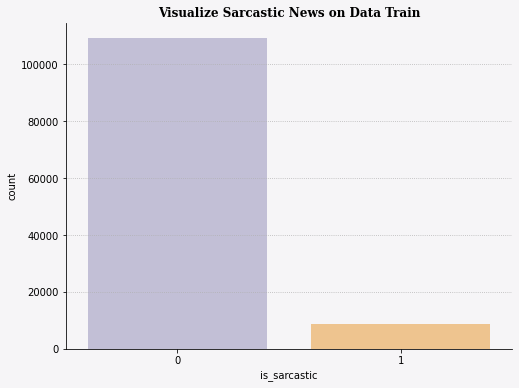

In [9]:
#trực quan hóa dữ liệu data to train
fig=plt.figure(figsize=(8,6))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
ax=plt.subplot(1,1,1)
ax.set_facecolor(background_color)
ax.set_title('Visualize Sarcastic News on Data Train',fontweight='bold',fontfamily='serif')
for i in ['top','right']:
    ax.spines[i].set_visible(False)
ax.grid(linestyle=':',axis='y')
sns.countplot(data_train['is_sarcastic'],palette='PuOr_r')

Vì dữ liệu trên bị mất cân bằng trầm trọng (*số tin tức châm biếm xấp xỉ bằng $14\%$ so với tin tức chính thống nên chúng em có dự định sẽ dùng hàm cân bằng lại dữ liệu*).

In [10]:
#loại bỏ cột không cần thiết, cột article_link không ảnh hưởng gì đến kết quả train model.
data_to_train = data_train.drop(columns='article_link')
data_to_test = data_test.drop(columns='article_link')
data_to_train 

,headline,is_sarcastic
0,Why the Louisiana Governor’s Race Is So Close,0
1,New York's AG shuts down crypto ap...,0
2,"Vaccine,Virus Deaths, California’s Trees: Your...",0
3,"New on Netflix, Amazon, Disney+, H...",0
4,Restoring a Lost Recycle Bin,0
...,...,...
118138,President Trump holds final midter...,0
118139,What to expect when Jeff Bezos lau...,0
118140,New York's AG shuts down crypto ap...,0
118141,When Is a Border Just a Border? Almost Never,0


#2. Pre-Processing Data Text

##Text Processing
* Mục đích:Tiền xử lý văn bản giúp đưa các Tiêu đề Báo đã crawl dạng Text về dạng dữ liệu có thể dự đoán và phân tích được (ý tưởng là biến đổi thành ma trận với các con số) 
* Sau khi tham khảo các bước Tiền Xử lý văn bản trong NLP, chúng em đút kết ra các và thực hiện các bước như sau:

Mục đích: Làm giảm số lượng các từ ngữ trong text không ảnh hưởng đến kết quả của model dự đoán, nhờ đó khi biểu diễn từ text sang vector thì kích thước của vector cũng nhỏ hơn.

**Lowercase** 
* Biến đổi các từ viết hoa thành các từ từ viết thường.
* Mục đích: Đồng bộ Tiêu đề văn bản, tránh lặp lại các từ cùng nghĩa nhưng viết hoa.
* Ví dụ: `friend` vs `Friend`, `text` vs `Text`, `canada` vs `CANADA`,...

In [11]:
#tạo hàm chuyển các từ viết hoa thành viết thường
def text_lowercase(text):
  return text.lower()

print("Healines of News before being lowercased: \n")
print(data_to_train['headline'].head(10))

#Viết thường toàn bộ Headlines trong bộ dữ liệu dùng để train.
print("\n Healines of News after being lowercased: \n")
data_to_train['headline'] = data_to_train['headline'].apply(text_lowercase)
print(data_to_train['headline'].head(10))

#Viết thường toàn bộ Headlines trong bộ dữ liệu dùng để test.
data_to_test['headline'] = data_to_test['headline'].apply(text_lowercase)

Healines of News before being lowercased: 

0        Why the Louisiana Governor’s Race Is So Close
1                New York's AG shuts down crypto ap...
2    Vaccine,Virus Deaths, California’s Trees: Your...
3                New on Netflix, Amazon, Disney+, H...
4                         Restoring a Lost Recycle Bin
5                Ted Bundy: The serial killer's fin...
6    Bolivia’s Evo Morales Faces Runoff, Early Elec...
7               Couple Goes On Romantic Date To Target
8                Richard Ramirez: The story, the ev...
9                How to watch the rare "ring of fir...
Name: headline, dtype: object

 Healines of News after being lowercased: 

0        why the louisiana governor’s race is so close
1                new york's ag shuts down crypto ap...
2    vaccine,virus deaths, california’s trees: your...
3                new on netflix, amazon, disney+, h...
4                         restoring a lost recycle bin
5                ted bundy: the serial killer's fin...
6

**Lemmatization** 
* Vì trong Tiếng Anh các từ có nhiều biến thể (go, goes, gone,...). Kỹ thuật Lemmatization giúp đưa các từ cùng words formation về dạng gốc của nó.
* Mục đích: Giúp giảm thiểu data cho những từ khác dạng nhưng đều nói về cùng một khái niệm, mức độ chính xác cao so với các phương pháp khác cũng đưa từ về dạng nguyên gốc vì khi biến đổi thư viện lemmatization trong nltk sẽ sử dụng bảng để tra từ gốc của các từ. 
* Cách Lemmatization nhận diện các từ trong bảng tra cứu của nó thông qua gán nhãn từ loại - *pos_tagger* - ví dụ từ `in`, `or` là `IN` (giới từ), `braver`, `cooler` là JJR (tính từ, so sánh hơn),...
* Ví dụ: UIT `has` `founded` for about 15 `years` => UIT `have` `found` for about 15 `year` 

In [12]:
lem = WordNetLemmatizer()

#tìm ra các tag từ thông dụng, ở đây chúng em chỉ giới hạn với các loại từ cơ bản nhất trong tiếng Anh: Tính từ (ADJ), Động từ (VERB), Danh từ (NOUN), Trạng từ(ADV)
def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None

#hàm lemmatizer giúp tìm ra từ gốc của cả một câu.
def lemmatizer(sentence):
  #tìm ra các pos tag của các từ trong câu
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)

  #biến đổi từng từ và trả về câu với các từ được biến đổi
  res_words = []
  #nếu không tìm được nhãn từ loại của từ (pos-tag) thì trả về chính từ đó
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lem.lemmatize(word, tag))

  return " ".join(res_words)

print("Healines of News before being lemmatized: \n")
print(data_to_train['headline'].head(10))

#Đưa về gốc các từ có thể đưa được trong toàn bộ Headlines trong bộ dữ liệu dùng để train
print("\n Healines of News after being lemmatized: \n")
data_to_train['headline'] = data_to_train['headline'].apply(lemmatizer)
print(data_to_train['headline'].head(10))

Healines of News before being lemmatized: 

0        why the louisiana governor’s race is so close
1                new york's ag shuts down crypto ap...
2    vaccine,virus deaths, california’s trees: your...
3                new on netflix, amazon, disney+, h...
4                         restoring a lost recycle bin
5                ted bundy: the serial killer's fin...
6    bolivia’s evo morales faces runoff, early elec...
7               couple goes on romantic date to target
8                richard ramirez: the story, the ev...
9                how to watch the rare "ring of fir...
Name: headline, dtype: object

 Healines of News after being lemmatized: 

0      why the louisiana governor ’ s race be so close
1    new york 's ag shut down crypto app , claim il...
2    vaccine , virus death , california ’ s tree : ...
3    new on netflix , amazon , disney+ , hulu and more
4                           restore a lost recycle bin
5          ted bundy : the serial killer 's final year
6

In [13]:
#Đưa về gốc các từ có thể đưa được trong toàn bộ Headlines trong bộ dữ liệu dùng để test
data_to_test['headline'] = data_to_test['headline'].apply(lemmatizer)

**Remove punctuation**

* Mục đích: Xóa các dấu câu như `,` , `!`, `;` để giảm bớt kích thước của text, tiết kiệm data và loại bỏ các dữ kiện không cần thiết.

In [14]:
def remove_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

print("Healines of News before being removing punctuation: \n")
print(data_to_train['headline'].head(10))

#Loại bỏ dấu toàn bộ Headlines trong bộ dữ liệu dùng để train.
print("Healines of News before being removing punctuation: \n")
data_to_train['headline'] = data_to_train['headline'].apply(remove_punctuation)
print(data_to_train['headline'].head(10))

#Loại bỏ dấu toàn bộ Headlines trong bộ dữ liệu dùng để test
data_to_test['headline'] = data_to_test['headline'].apply(remove_punctuation)

Healines of News before being removing punctuation: 

0      why the louisiana governor ’ s race be so close
1    new york 's ag shut down crypto app , claim il...
2    vaccine , virus death , california ’ s tree : ...
3    new on netflix , amazon , disney+ , hulu and more
4                           restore a lost recycle bin
5          ted bundy : the serial killer 's final year
6    bolivia ’ s evo morale face runoff , early ele...
7                 couple go on romantic date to target
8    richard ramirez : the story , the evidence , t...
9    how to watch the rare `` ring of fire '' solar...
Name: headline, dtype: object
Healines of News before being removing punctuation: 

0      why the louisiana governor ’ s race be so close
1    new york s ag shut down crypto app  claim ille...
2    vaccine  virus death  california ’ s tree  you...
3        new on netflix  amazon  disney  hulu and more
4                           restore a lost recycle bin
5            ted bundy  the serial ki

**Remove whitespace**
* Mục đích: Xóa tất cả khoảng trắng `space`, `tab`,.. trong text để giảm bớt kích thước của text.

In [15]:
def remove_whitespace(text):
  return " ".join(text.split())

print("Healines of News before being removing whitespace: \n")
print(data_to_train['headline'].head(10))

#Loại bỏ khoảng trắng toàn bộ Headlines trong bộ dữ liệu dùng để train.
print("Healines of News before being removing whitespace: \n")
data_to_train['headline'] = data_to_train['headline'].apply(remove_whitespace)
print(data_to_train['headline'].head(10))

#Loại bỏ khoảng trắng toàn bộ Headlines trong bộ dữ liệu dùng để test
data_to_test['headline'] = data_to_test['headline'].apply(remove_whitespace)

Healines of News before being removing whitespace: 

0      why the louisiana governor ’ s race be so close
1    new york s ag shut down crypto app  claim ille...
2    vaccine  virus death  california ’ s tree  you...
3        new on netflix  amazon  disney  hulu and more
4                           restore a lost recycle bin
5            ted bundy  the serial killer s final year
6    bolivia ’ s evo morale face runoff  early elec...
7                 couple go on romantic date to target
8    richard ramirez  the story  the evidence  the ...
9    how to watch the rare  ring of fire  solar ecl...
Name: headline, dtype: object
Healines of News before being removing whitespace: 

0      why the louisiana governor ’ s race be so close
1    new york s ag shut down crypto app claim illeg...
2    vaccine virus death california ’ s tree your t...
3           new on netflix amazon disney hulu and more
4                           restore a lost recycle bin
5             ted bundy the serial kill

**Remove default stopwords**

* Mục đích: xóa các stopwords (*là những từ xuất hiện nhiều trong ngôn ngữ tự nhiên, tuy nhiên có tác dụng chủ yếu bổ trợ cho ngữ pháp nhưng không mang nhiều ý nghĩa.*)
* Ví dụ các *stopwords* trong Tiếng Anh:

In [16]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
#xóa các stopwords trong câu
def remove_stopwords(text):
  stop_words = set(stopwords.words("english"))
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word not in stop_words]
  return filtered_text

print("Healines of News before being removing stopwords: \n")
print(data_to_train['headline'].head(10))

#Loại bỏ stopwords toàn bộ Headlines trong bộ dữ liệu dùng để train.
print("Healines of News before being removing stopwords: \n")
data_to_train['headline'] = data_to_train['headline'].apply(remove_stopwords)
print(data_to_train['headline'].head(10))

#Loại bỏ stopwords toàn bộ Headlines trong bộ dữ liệu dùng để test
data_to_test['headline'] = data_to_test['headline'].apply(remove_stopwords)

Healines of News before being removing stopwords: 

0      why the louisiana governor ’ s race be so close
1    new york s ag shut down crypto app claim illeg...
2    vaccine virus death california ’ s tree your t...
3           new on netflix amazon disney hulu and more
4                           restore a lost recycle bin
5             ted bundy the serial killer s final year
6    bolivia ’ s evo morale face runoff early elect...
7                 couple go on romantic date to target
8    richard ramirez the story the evidence the nig...
9    how to watch the rare ring of fire solar eclip...
Name: headline, dtype: object
Healines of News before being removing stopwords: 

0                [louisiana, governor, ’, race, close]
1    [new, york, ag, shut, crypto, app, claim, ille...
2    [vaccine, virus, death, california, ’, tree, t...
3                 [new, netflix, amazon, disney, hulu]
4                        [restore, lost, recycle, bin]
5            [ted, bundy, serial, killer,

**List to string**
* Sau khi qua các bước tiền xử lý như trên thì các headline có kiểu dữ liệu là list nên t cần chuyển về kiểu dữ liệu string để truyền vào hàm *CountVectorizer().fit_transform()*

In [18]:
def list_to_string(list):
  return ' '.join([str(elem) for elem in list])

data_to_train['headline'] = data_to_train['headline'].apply(list_to_string)
data_to_test['headline'] = data_to_test['headline'].apply(list_to_string)


In [19]:
data_to_train

,headline,is_sarcastic
0,louisiana governor ’ race close,0
1,new york ag shut crypto app claim illegal trade,0
2,vaccine virus death california ’ tree thursday...,0
3,new netflix amazon disney hulu,0
4,restore lost recycle bin,0
...,...,...
118138,president trump hold final midterm rally missouri,0
118139,expect jeff bezos launch space,0
118140,new york ag shut crypto app claim illegal trade,0
118141,border border almost never,0


# Convert the text to a matrix
* ***CountVectorizer*** *dùng để chuyển một đoạn văn cho trước thành một vector dựa vào số lần xuất hiện của mỗi từ trong cả đoạn văn đó*
* **Suy đoán:** Khi train model với data này thì model dựa trên những từ có "tần suất xuất hiện trong câu" **cao** để đưa ra dự đoán.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


Xem demo để hiểu rõ hơn cách *CountVectorizer* làm việc.

In [21]:
# Demo
sentences = ['Two roads diverged in a yellow wood', 
             'And sorry I could not travel both', 
             'And sorry I could not travel both']
#sưu tầm thơ Tiếng Anh, bài The Road Not Taken


test_vectorizer = CountVectorizer()
test_vectorizer.fit(sentences)

vector = test_vectorizer.transform(sentences)

#sắp xếp các từ theo chỉ số của nó với thứ tự bảng chữ cái alphabet
vocabulary = sorted(test_vectorizer.vocabulary_.items(), key=lambda x: x[1])
print("Volcabularies in the poem and its frequency: ", vocabulary)
print()

#trong ma trận nếu từ có xuất hiẹn trong câu sẽ trả về giá trị 1, ngược lại là 0
#có tổng cộng 12 từ trong 3 câu trên đoạn thơ trên, từ and không xuất hiện ở câu đầu tiên nên gán giá trị bằng 0, xuất hiện trong câu 2, 3 nên có giá trị bằng 1
#tương tự với các từ còn lại 
print("Sentences in the poem to vector: \n", vector.toarray())
print()

# Kiểu dữ liệu của vector[1](ở dòng thơ thứ 2) là sparse-matrix(các vị trí có giá trị khác 0 sẽ được lưu lại {vị trí, giá trị})
print("sentences[1]: \n", vector[1])

Volcabularies in the poem and its frequency:  [('and', 0), ('both', 1), ('could', 2), ('diverged', 3), ('in', 4), ('not', 5), ('roads', 6), ('sorry', 7), ('travel', 8), ('two', 9), ('wood', 10), ('yellow', 11)]

Sentences in the poem to vector: 
 [[0 0 0 1 1 0 1 0 0 1 1 1]
 [1 1 1 0 0 1 0 1 1 0 0 0]
 [1 1 1 0 0 1 0 1 1 0 0 0]]

sentences[1]: 
   (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1


#Traning Model And Testing
<a name="model"></a>

In [22]:
vectorizer_train = CountVectorizer()

#chuyển tất các headline đã được xử lý trong data train sang vector
X_train = vectorizer_train.fit_transform(data_to_train['headline'])
y_train = data_to_train['is_sarcastic']

#Đưa vector vocabulary của vectorizer_test về định dạng giống vectorizer_train
vectorizer_test = CountVectorizer(vocabulary=vectorizer_train.vocabulary_) 
X_test = vectorizer_test.fit_transform(data_to_test['headline'])
y_test = data_to_test['is_sarcastic']

# Trainning
* Sử dụng thư viện MultinomialNB để phân loại class dựa theo xác suất, số lần xuất hiện, được sử dụng rộng rãi để phân loại văn bản (vì dữ liệu trên có dạng Bag of Words
Nơi chúng ta có dữ liệu đếm như ***Bag of Words hoặc TFIDF ***). 
* [Link tham khảo](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
model = MultinomialNB().fit(X_train, y_train)

## Predict

In [25]:
y_pred = model.predict(X_test)

## Check result

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     50150
           1       0.57      0.57      0.57      5916

    accuracy                           0.91     56066
   macro avg       0.76      0.76      0.76     56066
weighted avg       0.91      0.91      0.91     56066



In [28]:
print('Accuracy of Model on Testing when using coverting text to matrix and using MultinomialNB to train: \n', accuracy_score(y_test, y_pred))

Accuracy of Model on Testing when using coverting text to matrix and using MultinomialNB to train: 
 0.9088752541647345


##Giải thích và Nhận xét:
* Scores của class 0(tin tức chính thống) rất cao:
 + `precision = 0.95`: số headlines mô hình dự đoán đúng là tin chính thống trên tổng số headlines được đự đoán là tin chính thống.
 + `recall = 0.95` tất cả số headlines chính thống thực tế được xác định đúng.
 + `f1-score = 0.95`chỉ số trung hòa giữa precision và recall

=> Lí do: Chúng em nghĩ rằng do tập dữ liệu dùng để train model và tập dữ liệu tets
có sự phân phối của tin chính thống lớn hơn rất nhiều so với tin châm biếm nên ảnh hưởng nhiều tới thông số đo mô hình.
* Song song, Scores của class 1(tin tức châm biếm) chỉ ở mức trung bình:
 + `precision = 0.57`: số headlines mô hình dự đoán đúng là tin châm biếm trên tổng số headlines được đự đoán là tin châm biếm.
 + `recall = 0.57` tất cả số headlines châm biếm thực tế được xác định đúng.
 + `f1-score = 0.57`chỉ số trung hòa giữa precision và recall

=> Lí do: Do trên tập dữ liệu dùng để train model và tập dữ liệu test, tin tức châm biếm đều chỉ phần phối khoản $20%$ trên tổng số tin nên tỉ lệ True Positive bị ảnh hưởng dẫn đến Precision và Recall không cao, dẫn đến F1-score không cao.
* `accurray=0.91`: data train và data test có sự phân phối giữa hai class khá tương đồng nhau (chênh lệch giữa tin tức chính thống phân phối nhiều hơn khoảng $80%$ so với tin châm biếm trên cả hai tập dữ liệu), ngoài ra các bước tiền xử ;ý dữ liệu của chúng em đưa data về dạng dữ liệu phối hợp tốt với model để dẫn đến kết quả khả quan trên.

<Figure size 864x720 with 0 Axes>

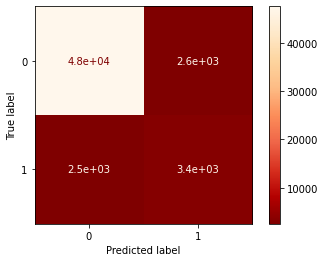

In [29]:
#với cách giải thích như trên, để thấy rõ hơn mối tương quan giữa output dự đoán và giá trị thật sự, chúng em vẽ confusion matrix
#tương đương với đầu vào và đầu ra bao gồm 56066 headlines.
plt.figure(figsize=(12,10))
plot_confusion_matrix(model, X_test, y_test, cmap = 'OrRd_r') 
plt.show()

* Từ trái sang phải, từ trên xuống dưới:
  + `4.8e+04`: TN (True Negative) - Số lượng headlines của bài báo chính thống dự đoán chính xác.
  + `2.6e+03`: FP (False Positive) - Số lượng headlines của bài báo chính thống nhưng bị dự đoán thành bài báo châm biếm.
  + `2.5e+03`: FN (False Negative) - Số lượng headlines của bài báo châm biếm nhưng bị dự đoán thành bài báo chính thống.
  +`3.4e+0.3` TP (True Positive) - Số lượng headlines của bài báo châm biếm dự đoán chính xác.

# Training with Vector space model

##**Apply TF-IDF**

TF-IDF (Term Frequency – Inverse Document Frequency) là 1 kĩ thuật sử dụng trong khai phá dữ liệu văn bản. Trọng số này được sử dụng để đánh giá tầm quan trọng của một từ trong một văn bản phụ thuộc vào hai chỉ số quan trọng:
+ TF: Số lần từ đó xuất hiện trong một tất cả headlines ở dữ liệu đầu vào
+ IDF: Tỉ lệ giữa tổng số headllines trong tập dữ liệu với tổng số headlines mà từ đó xuất hiện, giúp đánh giá tầm quan trọng thực sự của từ đó đối với model train.

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_train_weighted = tfidf.fit_transform(X_train)
X_test_weighted = tfidf.fit_transform(X_test)

## **Multinomial Naive Bayes**
Sử dụng thư viện MultinomialNB để train model và có áp dụng thêm kỹ thuật TF-IDF làm trọng số.

In [31]:
model = MultinomialNB().fit(X_train_weighted, y_train)
y_pred = model.predict(X_test_weighted)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     50150
           1       0.87      0.03      0.06      5916

    accuracy                           0.90     56066
   macro avg       0.88      0.52      0.50     56066
weighted avg       0.89      0.90      0.85     56066



In [32]:
print('Accuracy of Model on Testing when using TF-IDF to matrix and using MultinomialNB to train: \n', accuracy_score(y_test, y_pred))

Accuracy of Model on Testing when using TF-IDF to matrix and using MultinomialNB to train: 
 0.8973709556594014


##Giải thích và Nhận xét:
* Scores của class 0(tin tức chính thống) rất cao:
 + `precision = 0.9`: số headlines mô hình dự đoán đúng là tin chính thống trên tổng số headlines được đự đoán là tin chính thống.
 + `recall = 1` tất cả số headlines chính thống thực tế được xác định đúng, chứng tỏ xác suất một tin chính thống được dự đoán là tin chính thống đúng 100%.
 + `f1-score = 0.95`chỉ số trung hòa giữa precision và recall

=> Lí do: Nguyên nhân có thể là do chênh lệch phân phối dữ liệu kể trên là cho model có xu hướng dự đoán headlines là tin tức chính thống hơn châm biếm, dẫn đến độ đo của model hoạt động trên tập class vô cùng cao. 
* Song song, Scores của class 1(tin tức châm biếm) thấp hơn rất nhiều:
 + `precision = 0.87`: số headlines mô hình dự đoán đúng là tin châm biếm trên tổng số headlines được đự đoán là tin châm biếm.
 + `recall = 0.03` tất cả số headlines châm biếm thực tế được xác định đúng, có thể hiểu là cứ 100 tin châm biếm thì chỉ có 3 tin được dự đoán là tin châm biếm. (rất tệ)
 + `f1-score = 0.57`chỉ số trung hòa giữa precision và recall

=> Lí do: Model không nắm bắt tốt được các dòng tin châm biếm, nên dù khả năng nhận biết tin tức chính xác cao (nếu model dự đoán nó là tin châm biếm thì $87\%$ nó là tin châm biếm - nhưng chỉ có $3\%$ tin tức châm biếm được dự đoán đúng trên tổng số tin tức châm biếm)
+ `accurray=0.9`

=> Lí do:
  + Độ chính xác giảm so với khi chưa áp dụng tf-idf
  + Dự đoán là do tựa đề một bài báo khá ngắn, nên khả năng một từ bị lập lại trong tựa đề sẽ thấp, nên việc tính từ xuất hiện nhiều hay ít không đem lại hiệu quả cao so với kết quả trên.

## **Bernoulli Naive Bayes**
Vì sau khi chuyển đổi text sang kiểu vector, tập dữ liệu chỉ mang giá trị `0` hoặc `1`, điều kiện này thỏa để sử dụng BearnoulliNB để train model.


In [33]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     50150
           1       0.95      0.38      0.54      5916

    accuracy                           0.93     56066
   macro avg       0.94      0.69      0.75     56066
weighted avg       0.93      0.93      0.92     56066



In [34]:
print('Accuracy of Model on Testing when using TF-IDF to matrix and using BernoulliNB to train: \n', accuracy_score(y_test, y_pred))

Accuracy of Model on Testing when using TF-IDF to matrix and using BernoulliNB to train: 
 0.9324724431919523


##Giải thích và Nhận xét:
* Các thông số ***khả quan hơn*** so với việc huấn luyên với Multinomial Naive Bayes khi chưa áp dụng tf-idf
* Như giải thích ở trên, việc phân loại class dựa trên số lần xuất hiện không được hiệu quả cao do: tựa đề bài báo ngắn nên khả năng một từ bị lập lại trong tựa đề sẽ thấp, nên việc từ xuất hiện nhiều hay ít không đem lại hiệu quả cao so với kết quả trên.
* Và vì một tựa đề bài báo thường ngắn, nên chúng em xem xét thêm phương pháp khác là **word2vec: chuyển mỗi từ thành một vector, nên một tựa đề sẽ được biểu diễn thành một ma trận hai chiều** và sử dụng Neural NetWork để train model.

# Demo word2vec


**Hướng tiền xử lý dữ liệu Word2vec:**

**B1: Mỗi headline sẽ được biểu diễn thành ma trận n x m chiều**. 

Với:

* n = len(model_w2v.wv.vocab): số lượng từ xuất hiện trong data_to_w2v
* m = len(model_w2v['word']): kích thước của vector thể hiện một từ 

=> Mỗi hàng của ma trận sẽ là vector biểu diễn giá trị của một từ.

**B2: Load giá trị vào ma trận**

* Với các từ thuộc headline thì tại các hàng tương ứng, vector sẽ biểu diễn giá trị của từ đó.

* Với các từ không có trong headline thì tại các hàng tương ứng, vector sẽ là vector 0.

In [35]:
#tách các từ trong câu thành kiểu list trong data train
words = []
for i in data_to_train.headline.values:
  words.append(i.split())

#tách các từ trong câu thành kiểu list trong data test
words_test = []
for i in data_to_test.headline.values:
  words_test.append(i.split())
  words_test
#in ra demo 9 headlines đầu tiên
words[:9]

[['louisiana', 'governor', '’', 'race', 'close'],
 ['new', 'york', 'ag', 'shut', 'crypto', 'app', 'claim', 'illegal', 'trade'],
 ['vaccine',
  'virus',
  'death',
  'california',
  '’',
  'tree',
  'thursday',
  'evening',
  'briefing'],
 ['new', 'netflix', 'amazon', 'disney', 'hulu'],
 ['restore', 'lost', 'recycle', 'bin'],
 ['ted', 'bundy', 'serial', 'killer', 'final', 'year'],
 ['bolivia',
  '’',
  'evo',
  'morale',
  'face',
  'runoff',
  'early',
  'election',
  'return',
  'show'],
 ['couple', 'go', 'romantic', 'date', 'target'],
 ['richard', 'ramirez', 'story', 'evidence', 'night', 'stalker']]

In [36]:
import gensim
from gensim.models import Word2Vec

In [37]:
# Text processing
# Mặc định mỗi headline tương ứng với một câu
# data_to_w2v = data_to_train['headline'].apply(text_lowercase)
# data_to_w2v = data_to_w2v.apply(remove_punctuation)
# data_to_w2v = data_to_w2v.apply(remove_whitespace)
# data_to_w2v = data_to_w2v.apply(remove_stopwords)

Chúng em sẽ chuyển `41303` từ thành một vector, mỗi từ là một vector có kich thươc `200x5`

In [54]:
# Tạo ra model để tính toán mối quan hệ giữa các từ xuất hiện trong data_to_w2v
# size: kích thước vector biểu diễn cho một từ (size càng lớn thì càng phân biệt rõ sự khác nhau của một từ với các từ còn lại)
# window: số lượng từ lân cận của từ đang xét trong câu.
model_w2v = gensim.models.Word2Vec(sentences = words, min_count = 1, size = 1, window = 5)

In [55]:
#demo sử dụng model_w2v đối với từ ví dụ "word"
model_w2v['word']

array([-4.596046], dtype=float32)

In [56]:
len(model_w2v.wv.vocab)

41303

In [57]:
num_voca = len(model_w2v.wv.vocab)

In [58]:
#vectơ hóa các từ, bằng cách chuyển thành một chuỗi các số nguyên trong trên data train
tokenizer = text.Tokenizer(num_voca)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
tokenized_test = tokenizer.texts_to_sequences(words_test)
_x_train = sequence.pad_sequences(tokenized_train, maxlen = 20)
_x_test = sequence.pad_sequences(tokenized_test, maxlen = 20)

Tuy nhiên không phải các từ trong headlines của bộ data đều có trong **model_w2w.wv.vocab** nên chúng ta sẽ tạo thêm một vector riêng cho những từ đó. Vector này chỉ gồm các phần tử có giá trị là 0, nên ta tăng kích thước của vocab_size lên 1.

In [59]:
vocab_size = len(tokenizer.word_index) + 1

In [60]:
#tạo trọng số cho ma trận vector của các từ
def get_matrix_weights(model, vocab):
  # như đã nói ở trên ta phải tăng kích thước của vocab_size lên 1 cho các từ chưa biết
  vocab_size = len(vocab) + 1
  weight = np.zeros((vocab_size, 1))
  for word, index in vocab.items():
    weight[index] = model[word]
  return weight

In [61]:
#tạo trọng số ma trận cho vector của các từ trong vocab
get_embbed_vector = get_matrix_weights(model_w2v, tokenizer.word_index)

In [62]:
token_word = text.Tokenizer(num_voca)

##Traning Model with WORD2VEC
 * Chúng em sẽ sử dụng thư viện Keras để sử dụng Neural Network, vì việc traning model này liên quan hầu hết tới *Deep Learning* nên chúng em có tham khảo source code từ nguồn dưới đây:
 * [Link tham khảo](https://www.kaggle.com/madz2000/sarcasm-detection-with-glove-word2vec-83-accuracy)
 * [Link tham khảo về mô hình mạng LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory)

In [63]:
_model_w2v = Sequential()
#thêm vào model các lớp layer chưa được đào tạo
_model_w2v.add(Embedding(vocab_size, output_dim=1, weights = [get_embbed_vector], input_length=20,trainable=True ))
#xây dựng mô hình LSTM cho model để train
_model_w2v.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
_model_w2v.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
_model_w2v.add(Dense(1, activation='sigmoid'))
_model_w2v.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

del get_embbed_vector

In [64]:
_model_w2v.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 1)             41304     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 20, 256)           133120    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                55680     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 230,169
Trainable params: 230,169
Non-trainable params: 0
_________________________________________________________________


In [65]:
print("Accuracy of the model on traning: " , _model_w2v.evaluate(_x_train,data_to_train.is_sarcastic)[1])


3692/3692 [==============================] - 72s 17ms/step - loss: 0.6173 - acc: 0.8768
Accuracy of the model on traning:  0.8764294385910034


In [66]:
print("Accuracy of the model on testing: " , _model_w2v.evaluate(_x_test,data_to_test.is_sarcastic)[1])

1753/1753 [==============================] - 31s 17ms/step - loss: 0.6345 - acc: 0.8934
Accuracy of the model on testing:  0.8933578133583069


##Giải thích và Nhận xét
So với các phương pháp trên, Word2Vec có kết quả khá khả quan trên cả bộ dữ liệu train và bộ dữ liệu test:

Chúng em nghĩ vì có thể vì những lí do như sau:
* Các phương pháp trên đều sử dụng phương pháp đếm và xây dựng ma trận dựa trên tần suất xuất hiện của các từ, sau khi chuyển thành kiểu dữ liệu vector để predict thì predict vẫn có kết quả tốt.
* Word2vec học trực tiếp word vector có số chiều thấp trong quá trình dự đoán các từ xung quanh mỗi từ. Đặc điểm của phương pháp này là nhanh hơn và có thể dễ dàng kết hợp một câu một văn bản mới hoặc thêm vào từ vựng. So với phương pháp trên Word2Vec không tốn nhiều bước xử lý và thời gian.